# 腾讯弹幕数据分析

## 数据读入

In [7]:
# 导入库
import os  
import jieba
import numpy as np
import pandas as pd 

from pyecharts.charts import Bar, Pie, Line, WordCloud, Page
from pyecharts import options as opts 
from pyecharts.globals import SymbolType

import stylecloud
from IPython.display import Image # 用于在jupyter lab中显示本地图

In [8]:
# 读入数据
data_list = os.listdir('../data/')

df_all = pd.DataFrame()

for i in data_list:
    # 判断
    if i.split('.')[-1] == 'csv':  
        print(i) 
        df_one = pd.read_csv(f'../data/{i}', engine='python', encoding='utf-8', index_col=0)  
        df_all = df_all.append(df_one, ignore_index=False)

print(df_all.shape) 

第10集.csv
第11集.csv
第12集.csv
第13集.csv
第14集.csv
第15集.csv
第1集.csv
第2集.csv
第3集.csv
第4集.csv
第5集.csv
第6集.csv
第7集.csv
第8集.csv
第9集.csv
(271049, 7)


In [9]:
df_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271049 entries, 0 to 17637
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   episodes    271049 non-null  int64 
 1   comment_id  271049 non-null  int64 
 2   oper_name   139035 non-null  object
 3   vip_degree  271049 non-null  int64 
 4   content     271049 non-null  object
 5   time_point  271049 non-null  int64 
 6   up_count    271049 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 16.5+ MB


In [10]:
df_all.head() 

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count
0,10,6691339556383867223,NaN,5,1,27,0
1,10,6691340141707381348,沉尘,2,王漫妮 : 来了来了,28,1
2,10,6691340663373931124,NaN,5,钟晓芹 : 第一来了,29,1
3,10,6691340707249533722,NaN,2,哈哈哈哈来了,26,0
4,10,6691340998716925826,NaN,0,每天等更新,27,3


## 数据预处理

In [11]:
# 提取数据
pattern = r'(王漫妮\s*|钟晓芹\s*|顾佳\s*|陈屿\s*|许幻山\s*|飒飒*\s|浪浪*\s):.*'
df_all['danmu_role'] = df_all['content'].str.extract(pattern)[0].str.strip()
df_all.head() 

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count,danmu_role
0,10,6691339556383867223,NaN,5,1,27,0,NaN
1,10,6691340141707381348,沉尘,2,王漫妮 : 来了来了,28,1,王漫妮
2,10,6691340663373931124,NaN,5,钟晓芹 : 第一来了,29,1,钟晓芹
3,10,6691340707249533722,NaN,2,哈哈哈哈来了,26,0,NaN
4,10,6691340998716925826,NaN,0,每天等更新,27,3,NaN


In [12]:
def transform_name(x):
    if x=='王漫妮' or x=='顾佳' or x=='钟晓芹' or x=='陈屿' or x=='许幻山' or x=='飒飒' or x=='浪浪':
        return 'VIP用户'
    elif x=='NaN':
        return '未知用户'
    else:
        return '普通用户'
    
df_all['danmu_level'] = df_all['danmu_role'].apply(transform_name)
df_all.head() 

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count,danmu_role,danmu_level
0,10,6691339556383867223,NaN,5,1,27,0,NaN,普通用户
1,10,6691340141707381348,沉尘,2,王漫妮 : 来了来了,28,1,王漫妮,VIP用户
2,10,6691340663373931124,NaN,5,钟晓芹 : 第一来了,29,1,钟晓芹,VIP用户
3,10,6691340707249533722,NaN,2,哈哈哈哈来了,26,0,NaN,普通用户
4,10,6691340998716925826,NaN,0,每天等更新,27,3,NaN,普通用户


## 数据可视化

### 弹幕发送人群等级分布

In [13]:
level_num = df_all['danmu_level'].value_counts()
level_num 

普通用户     233528
VIP用户     37521
Name: danmu_level, dtype: int64

In [14]:
data_pair =  [list(z) for z in zip(level_num.index.tolist(), level_num.values.tolist())]

# 绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
pie1.add('', data_pair, radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='弹幕发送人群等级分布'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#6FB27C', '#FFAF34'])
pie1.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

### VIP用户最喜欢使用的弹幕角色？

In [15]:
role_num = df_all['danmu_role'].value_counts()
role_num

王漫妮    23980
顾佳      7091
钟晓芹     3144
飒飒      1445
浪浪       732
陈屿       675
许幻山      454
Name: danmu_role, dtype: int64

In [16]:
# 柱形图
bar1 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar1.add_xaxis(role_num.index.tolist())
bar1.add_yaxis("", role_num.values.tolist(), category_gap='5%')
bar1.set_global_opts(title_opts=opts.TitleOpts(title="VIP用户最喜欢使用的弹幕角色"), 
                     visualmap_opts=opts.VisualMapOpts(max_=21027),
                    )
bar1.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

### 弹幕发送字数分布

In [17]:
word_num = df_all.content.apply(lambda x:len(x)) 
word_num.describe() 

count    271049.000000
mean         12.112655
std           6.599164
min           1.000000
25%           8.000000
50%          11.000000
75%          16.000000
max         489.000000
Name: content, dtype: float64

In [18]:
word_num = df_all.content.apply(lambda x:len(x)) 

# 分箱
bins = [0,5,10,15,20,25,30,35,40,45,50,500]  
word_num_cut = pd.cut(word_num, bins, right=False).value_counts()
word_num_cut = word_num_cut.sort_index()
word_num_cut

[0, 5)       18720
[5, 10)      85516
[10, 15)     83993
[15, 20)     47592
[20, 25)     26503
[25, 30)      7584
[30, 35)       841
[35, 40)       163
[40, 45)        58
[45, 50)        26
[50, 500)       53
Name: content, dtype: int64

In [20]:
# 柱形图
bar2 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar2.add_xaxis(word_num_cut.index.astype('str').tolist())
bar2.add_yaxis("", word_num_cut.values.tolist(), category_gap='4%')
bar2.set_global_opts(title_opts=opts.TitleOpts(title="弹幕发送字数分布"), 
                     visualmap_opts=opts.VisualMapOpts(max_=72694),
                    )
bar2.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

### 弹幕角色-王漫妮 词云图

In [30]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open(r"D:\BaiduNetdiskDownload\三十而已数据+代码\data\chineseStopWords.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['王漫妮', '顾佳', '钟晓芹', '陈屿', '许幻山',
                '江疏影', '童瑶', '毛晓彤', '杨玏', '李泽锋']
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['真的', '这部', '这是', '一种', '那种',
                    '哈哈哈', '哈哈哈哈', '啊啊啊']    
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

In [31]:
df_all['danmu_role'] = df_all.danmu_role.str.strip() 

In [32]:
role_num

王漫妮    23980
顾佳      7091
钟晓芹     3144
飒飒      1445
浪浪       732
陈屿       675
许幻山      454
Name: danmu_role, dtype: int64

In [33]:
#content_series=df_all[df_all.danmu_role=='王漫妮']['content']
content_series1 = df_all[df_all.content.str.replace(pattern, '').str.contains('漫妮|疏影')]['content']
text1 = get_cut_words(content_series1) 
text1[:5] 

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\18856\AppData\Local\Temp\jieba.cache
Loading model cost 1.199 seconds.
Prefix dict has been built successfully.


['江疏影', '妈粉', '军团', '点名', '喜欢']

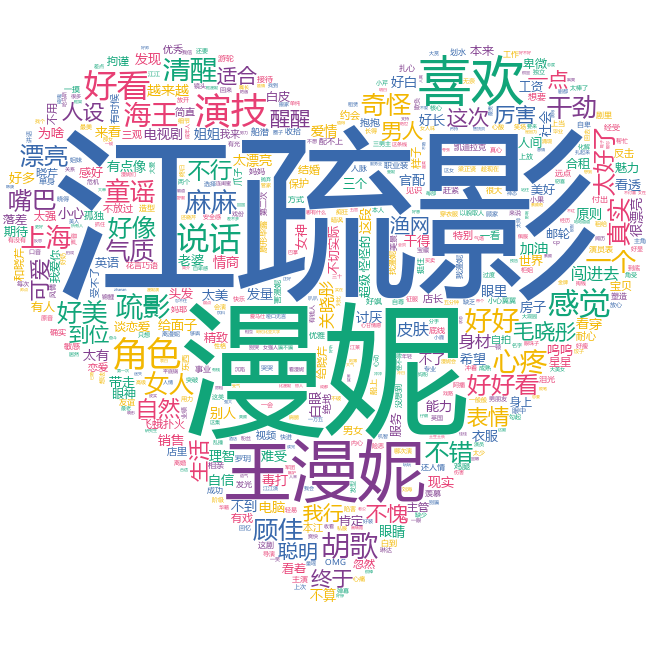

In [41]:
# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-heart',
                          size=653,
                          output_name='./html/弹幕角色王漫妮-词云图.png')
Image(filename='./html/弹幕角色王漫妮-词云图.png')  

### 弹幕角色-顾佳 词云图

In [37]:
# text2 = get_cut_words(content_series=df_all[df_all.danmu_role=='顾佳']['content'])
# text2[:5]  
content_series2 = df_all[df_all.content.str.replace(pattern, '').str.contains('顾佳|童瑶')]['content']
text2 = get_cut_words(content_series2) 
text2[:5] 

['戒指', '破碎', '顾佳', '离婚', '顾佳']

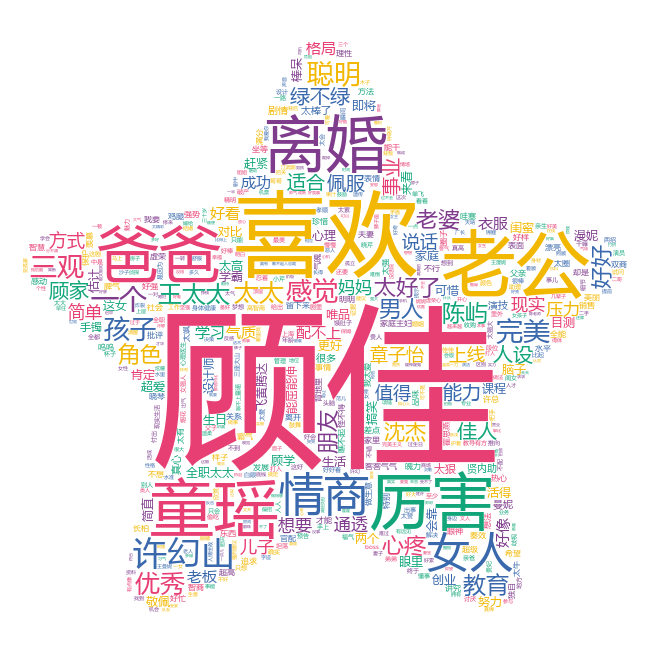

In [38]:
stylecloud.gen_stylecloud(text=' '.join(text2), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-star',
                          size=653,
                          output_name='./html/弹幕角色顾佳-词云图.png')
Image(filename='./html/弹幕角色顾佳-词云图.png')  

### 弹幕角色-钟晓芹 词云图

In [42]:
content_series3 = df_all[df_all.content.str.replace(pattern, '').str.contains('晓芹|晓彤')]['content']
text3 = get_cut_words(content_series3) 
text3[:5] 

['钟晓芹', '胎停', '晓芹', '过分', '晓芹']

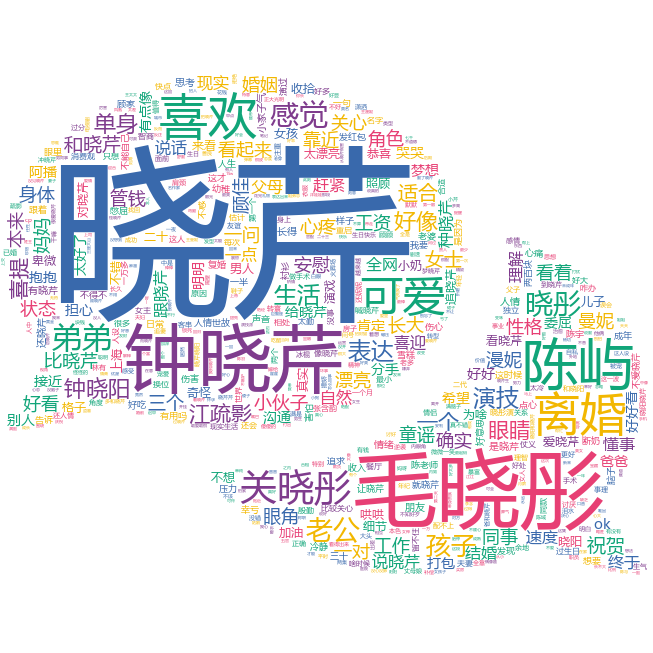

In [43]:
stylecloud.gen_stylecloud(text=' '.join(text3), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-comments',
                          size=653,
                          output_name='./html/弹幕角色钟晓芹-词云图.png')
Image(filename='./html/弹幕角色钟晓芹-词云图.png')  

### 弹幕角色-陈屿 词云图

In [44]:
content_series4 = df_all[df_all.content.str.replace(pattern, '').str.contains('陈屿|杨玏')]['content']
text4 = get_cut_words(content_series4) 
text4[:5] 

['陈屿', '不行', '陈屿', '鬼鬼祟祟', '陈屿']

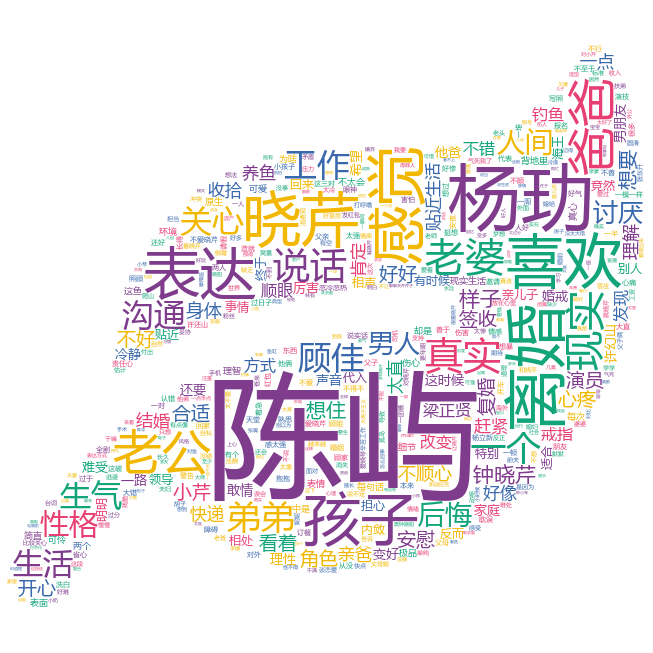

In [45]:
stylecloud.gen_stylecloud(text=' '.join(text4), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-leaf',
                          size=653,
                          output_name='./html/弹幕角色陈屿-词云图.png')
Image(filename='./html/弹幕角色陈屿-词云图.png') 

### 弹幕角色-许幻山 词云图

In [46]:
content_series5 = df_all[df_all.content.str.replace(pattern, '').str.contains('幻山')]['content']
text5 = get_cut_words(content_series5) 
text5[:5] 

['许幻山', '很会', '老婆', '眼色', '许幻山']

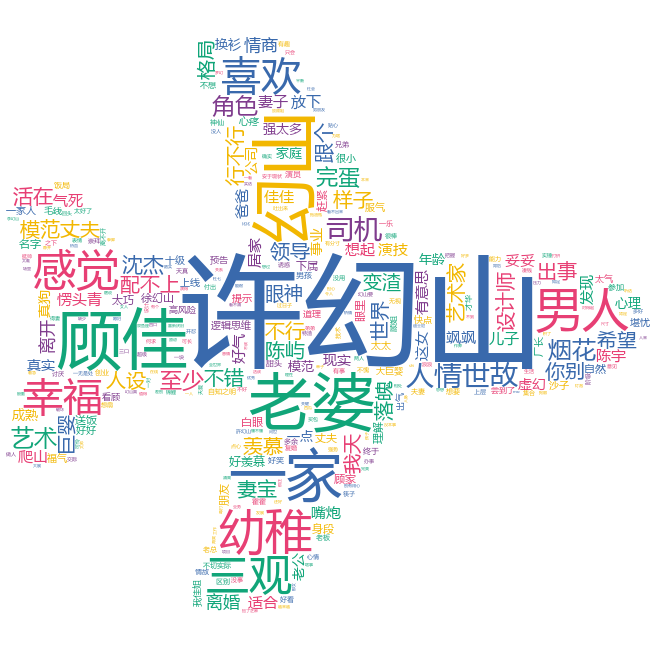

In [39]:
stylecloud.gen_stylecloud(text=' '.join(text5), 
                          max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-plane',
                          size=653,
                          output_name='./html/弹幕角色许幻山-词云图.png')
Image(filename='./html/弹幕角色许幻山-词云图.png')  

In [47]:
page1 = Page()
page1.add(pie1, bar1, bar2)
page1.render('./html/三十而已腾讯弹幕数据分析.html')

'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\html\\三十而已腾讯弹幕数据分析.html'